<a href="https://colab.research.google.com/github/MaxGama/DataScience/blob/master/WordCloud_Api_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O Processamento de Linguagem Natural (**Natural Language Processing — NLP**) é um campo da Ciência de Dados que integra a linguística com a computação. Basicamente, o NLP tem como objetivo ensinar um computador a não somente ler um texto, mas sim, interpretar seu real significado.

O objetivo deste artigo é mostrar como extrair e analisar informações textuais, no caso legendas, de vídeos do **YouTube** de maneira bem simples. Com tanta informação presente nos vídeos hospedados na plataforma, é possível extrair dados bem interessantes para alimentar aplicações de **NLP**. com os dados das legendas montaremos um **Wordcloud**.
Mas a intenção é expandir o uso desses tipos de dados em análises de **NLP**.


# Utilizando API’s
Para quem não é familiar com o termo, uma Interface de Programação de Aplicativos (**Application Programming Interface — API**) é um conjunto de códigos, protocolos e funções que automatizam processos. Ao invés de digitar um extenso código para obter algo, você pode usar uma **API** de alguém que já digitou esses códigos.
Com a **API do YouTube** é possível obter dados sobre número de *visualizações de vídeos*, *de inscritos*, *de comentários*, entre várias informações relacionadas ao vídeo, inclusive, legendas de vídeos. Mas há um outra **API** que extrai as legendas de um vídeo de forma muito mais prática.
A [**YouTube Transcript API**](https://pypi.org/project/youtube-transcript-api/) foi desenvolvida por **Jonas Depoix**, e tem exclusivamente como função obter legendas de vídeos do YouTube. Sua sintaxe é bem simples, como veremos nesse artigo.

## Começando os trabalhos

Primeiro passo temos que instalar os pacotes que são parte da **API** e também os pacotes do **Wordcloud**
Feito esse passo vamos às importações normais que sempre utilizamos em nossos projetos.

In [0]:
# Youtube transcript API
!pip install youtube_transcript_api -q
#  Wordcloud
!pip install wordcloud -q

In [0]:
# Importando as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from youtube_transcript_api import YouTubeTranscriptApi

É importante ressaltar que muitos vídeos não possuem legenda. Nesse caso, uma opção é utilizar as legendas que são geradas automaticamente pelo YouTube. O problema é que essa funcionalidade da plataforma ainda não é tão boa. Pelo que eu pude perceber, as legendas automáticas são boas quando a pessoa que está falando o faz de maneira mais pausada, como por exemplo, em vídeos de palestras.

Para esse projeto eu trouxe uma análise dos vídeos da Digital Influencer [Eduarda Ferrão](https://www.youtube.com/channel/UC7_nnou08iYdhJDDb_Lhqhw/videos?view=0&sort=p&flow=grid), com mais de 2,5 Milhões de inscritos em seu canal, ela é um fenômeno dessa nova geração de Youtubers.
O vídeo escolhido é o que mais tem visualizações no canal dela: [Aqui](https://www.youtube.com/watch?v=UIVtGXVED2Y) cujo o código é **'UIVtGXVED2Y'** como podemos observar no comando abaixo.

In [15]:
# obtendo os dados
transcript = YouTubeTranscriptApi.get_transcript(
                               'UIVtGXVED2Y', languages=['pt'])
# convertendo em DataFrame
df = pd.DataFrame(transcript)

# visualizando cinco primeiras entradas
df.head(10)

,text,start,duration
0,[Música],0.040,8.330
1,já a rainha,8.610,8.590
2,hoje não é da duda ele está com a duda e,12.940,9.720
3,você 211 estoque com o pedro e ele fazer,17.200,14.100
4,o kit come um cabinho e olhe nós combina,22.660,15.780
5,piscina col nas caras da nagem plástico,31.300,14.999
6,filme galerinha e silverton 12 coisa,38.440,13.770
7,onde faz por aí ei dois rolos de,46.299,10.411
8,plástico fiota iam já vi várias virgin e,52.210,6.930
9,pessoas cobrindo a piscina por silver,56.710,4.979


Observando parte do DataFrame, percebemos que aos 56 segundos do vídeo foi dito “Já vimos pessoas cobrindo a piscina com Silver tape.”, e essa legenda permaneceu na tela por 4.97 segundos.

In [7]:
# trocando pontuações por espaços
char = ["\n","!","?",".",","]
for symbol in char:
  df['text'] = df['text'].str.replace(symbol, " ")

# visualizando cinco primeiras entradas
df.head()

,text,start,duration
0,[Música],0.04,8.33
1,já a rainha,8.61,8.59
2,hoje não é da duda ele está com a duda e,12.94,9.72
3,você 211 estoque com o pedro e ele fazer,17.20,14.10
4,o kit come um cabinho e olhe nós combina,22.66,15.78


O objetivo agora é limpar o texto, retirando pontos de interrogação, vírgulas, pontos finais e o símbolo “\n” , que indica uma quebra de linha na legenda que aparece no vídeo.

Feita a primeira limpeza dos dados, vamos as contagens de palavras do vídeo. Nesse caso são 4.249 palavras.

O primeiro passo para plotar uma **Wordcloud** é juntar todo o texto em um único objeto através da função *join*.

In [8]:
# concatenar as palavras
palavras = " ".join(s for s in df['text'])

print("Quantidade de Palavras: {}".format(len(palavras)))

Quantidade de Palavras: 4249


## Plotando uma Wordcloud
Pelo resultado do código acima, sabemos que o texto de comédia tem 4.249 palavras, e na Wordcloud terão um maior destaque aquelas que mais aparecem. Mas antes de plotar o gráfico, temos que definir as stopwords, que são palavras que aparecem no texto mas que não fazem sentido isoladamente, como artigos e preposições. A biblioteca nltk possui várias funcionalidades relacionadas ao processo de análise de **NLP**, e uma delas é um banco de stopwords já definidas. O código abaixo plota uma wordcloud, considerando as stopwords da biblioteca **nltk**. Esse processo foi visto no estudo anterior sobre Wordclouds.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


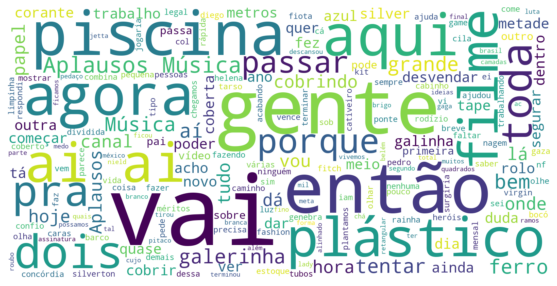

In [9]:
# importar wordcloud
from wordcloud import WordCloud

# importar a biblioteca nltk
import nltk
 
# baixar a base de stopwords
nltk.download('stopwords')
 
# atribuir as stopwords (em português) à variável
stopwords = nltk.corpus.stopwords.words('portuguese')

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.show()

Essa primeira **wordcloud** já nos dá uma noção das palavras mais ditas pelo Duda (como é conhecida pelos seus seguidores). Porém, ainda podemos visualizar algumas palavras que não fazem tanto sentido de forma isolada, como “vou”,”vai”,”pra”,”pro”, entre outras. Para incluí-las no objeto stopwords, basta utilizar a *função extend*, conforme o código abaixo mostra.

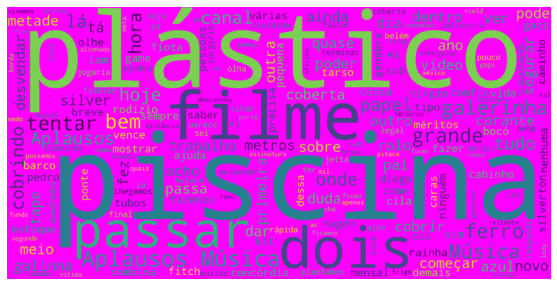

In [13]:
# lista de stopword
stopwords.extend(["pra","pro","deu",
                  "faz","vou","quer",
                  "vai","porque","gente",
                  "aqui","então", "ai",
                  "agora", "dá", "aí", "toda"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="magenta",
                      width=1600, height=800).generate(palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.show()

Após a limpeza de alguns termos temos uma Wordcloud mais *clean* e podemos perceber que a palavra mais falada é **Piscina**, seguida de **Plástico**. Uma vez que o Título do vídeo é: **COBRI A PISCINA COM PLÁSTICO FILME E ANDEI EM CIMA DA ÁGUA - EDUARDA FERRÃO**, então faz todo o sentido a nossa **Wordcloud**.

## Conclusão

Nesse exercício aprendemos a manipular uma poderosa **API** *youtube_transcript_api* e aliada às técnicas do **Wordcloud** que já tínhamos aplicado no exercício anterior, aprimoramos nossa técnica.